# Support Vector Machine (SVM) and Model Ensemble {-}

Here are the following steps of this notebook:

- Load the data.
- Analyze the data.
- Remove outliers and clean the data.
- Use GridSearchCV to find the best set of SVM hyperparameters.
- Build, train and evaluate the SVM model.
- Separately build, train and evaluate the other four classifiers (Logistic regression, Naive Bayes, Decision Tree, Random Forest) on the same dataset, then compare their performance with the SVM model's.
- Apply three model ensemble technics, i.e., Bagging, Boosting and Stacking, to solve the problem, then compare their performance with each other and with the use of individual models. Draw conclusion from what has been observed.

The dataset is 'data-breast-cancer.csv'. It is composed of attributes to build a prediction model.


## Import packages

In [ ]:
# Load the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Load the dataset
df = pd.read_csv("https://raw.githubusercontent.com/tnganduong/Fulbright_DataCourses/main/data-breast-cancer.csv", index_col=0)

In [ ]:
# Show some data samples
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883


This is a dataset used to detect whether a patient has breast cancer depending on the following features:

- diagnosis: (label) the diagnosis of breast (label) tissues (M = malignant, B = benign).
- radius: distances from center to points on the perimeter.
- texture: standard deviation of gray-scale values.
- perimeter: perimeter of the tumor.
- area: area of the tumor.
- smoothness: local variation in radius lengths.
- compactness: is equal to (perimeter^2 / area - 1.0).
- concavity: severity of concave portions of the contour.
- concave points: number of concave portions of the contour.
- symmetry: symmetry of the tumor shape.
- fractal dimension: "coastline approximation" - 1.



In [ ]:
# My code goes here

## Exploratory Data Analysis
- Analyze the data.
- Remove outliers and clean the data.

In [ ]:
# Show the general info of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 569 entries, 0 to 568
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   diagnosis               569 non-null    object 
 1   radius_mean             569 non-null    float64
 2   texture_mean            569 non-null    float64
 3   perimeter_mean          569 non-null    float64
 4   area_mean               569 non-null    float64
 5   smoothness_mean         569 non-null    float64
 6   compactness_mean        569 non-null    float64
 7   concavity_mean          569 non-null    float64
 8   concave points_mean     569 non-null    float64
 9   symmetry_mean           569 non-null    float64
 10  fractal_dimension_mean  569 non-null    float64
dtypes: float64(10), object(1)
memory usage: 53.3+ KB


In [ ]:
# Check N.A value
df.isna().sum()

diagnosis                 0
radius_mean               0
texture_mean              0
perimeter_mean            0
area_mean                 0
smoothness_mean           0
compactness_mean          0
concavity_mean            0
concave points_mean       0
symmetry_mean             0
fractal_dimension_mean    0
dtype: int64

In [ ]:
# Drop duplicates
df = df.drop_duplicates(ignore_index=True)
df.shape

(569, 11)

In [ ]:
# Separate categorical and numerical features
# data_label = df.diagnosis
# data_features = df.drop(['target'], axis=1)
data_features = [col for col in df.columns if df[col].dtype == 'float64']

<Axes: xlabel='diagnosis', ylabel='count'>

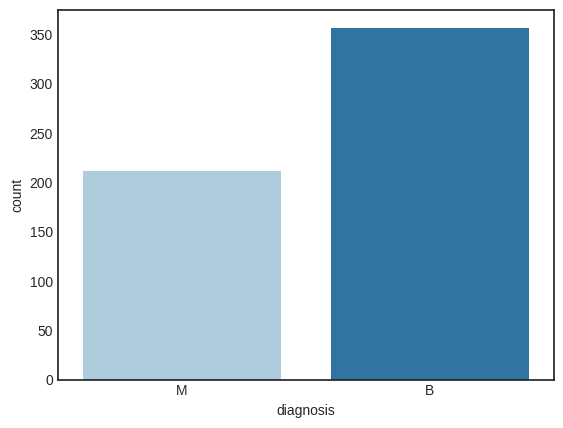

In [ ]:
# @title Data label distribution
sns.countplot(x=df['diagnosis'], palette='Paired')

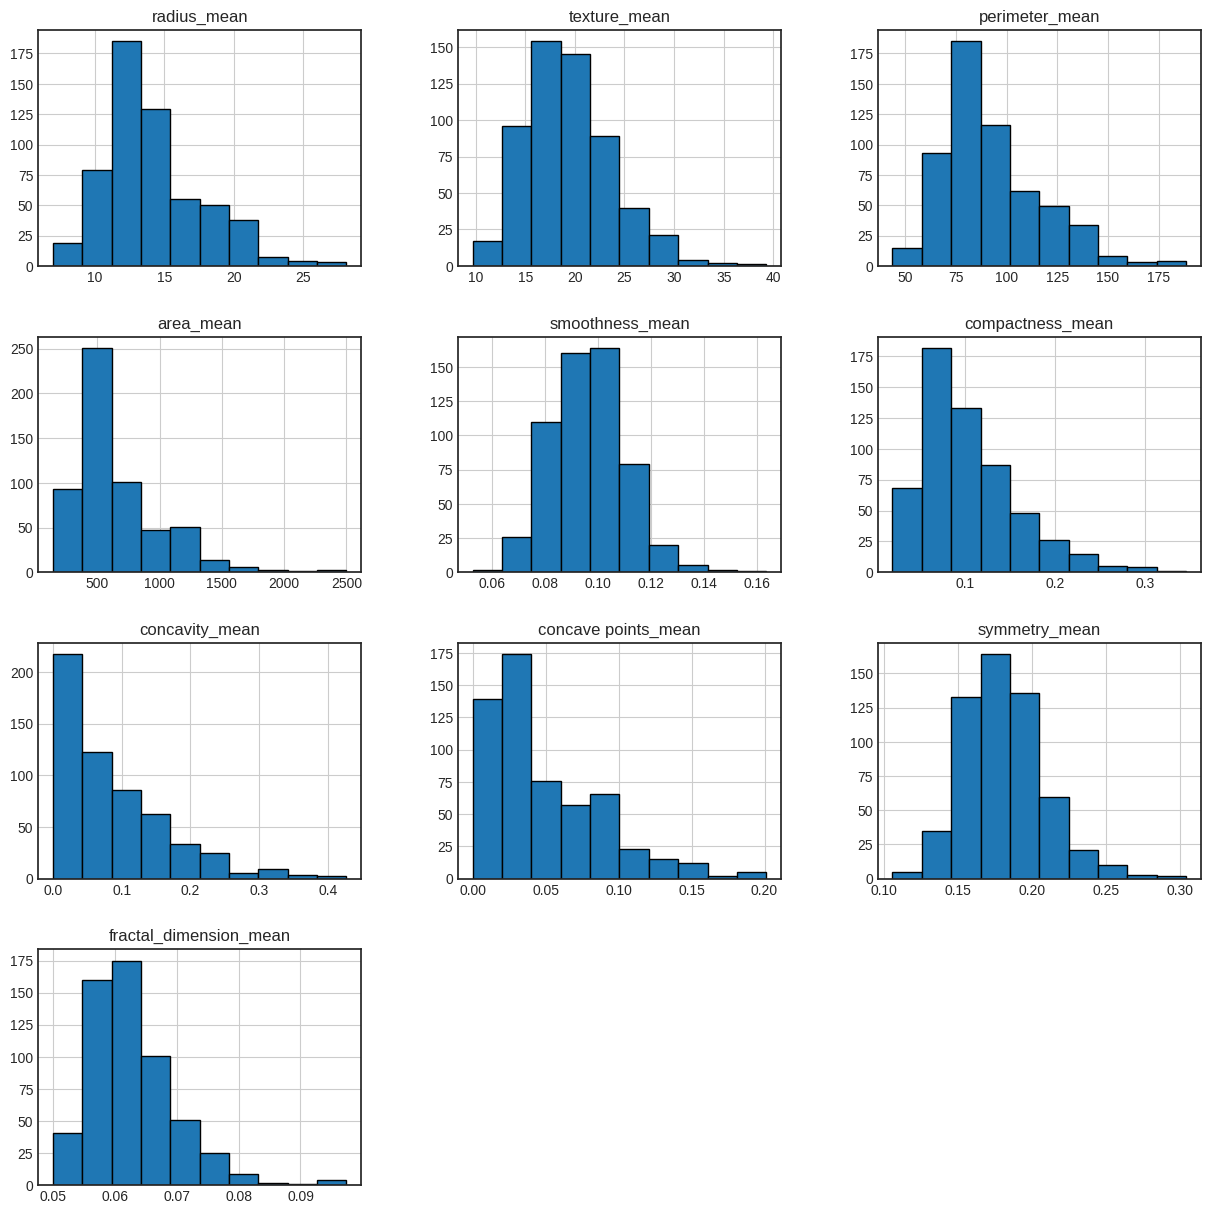

In [ ]:
# @title Histograms of all data features
df.hist(figsize=(15,15), edgecolor="black")
plt.show()

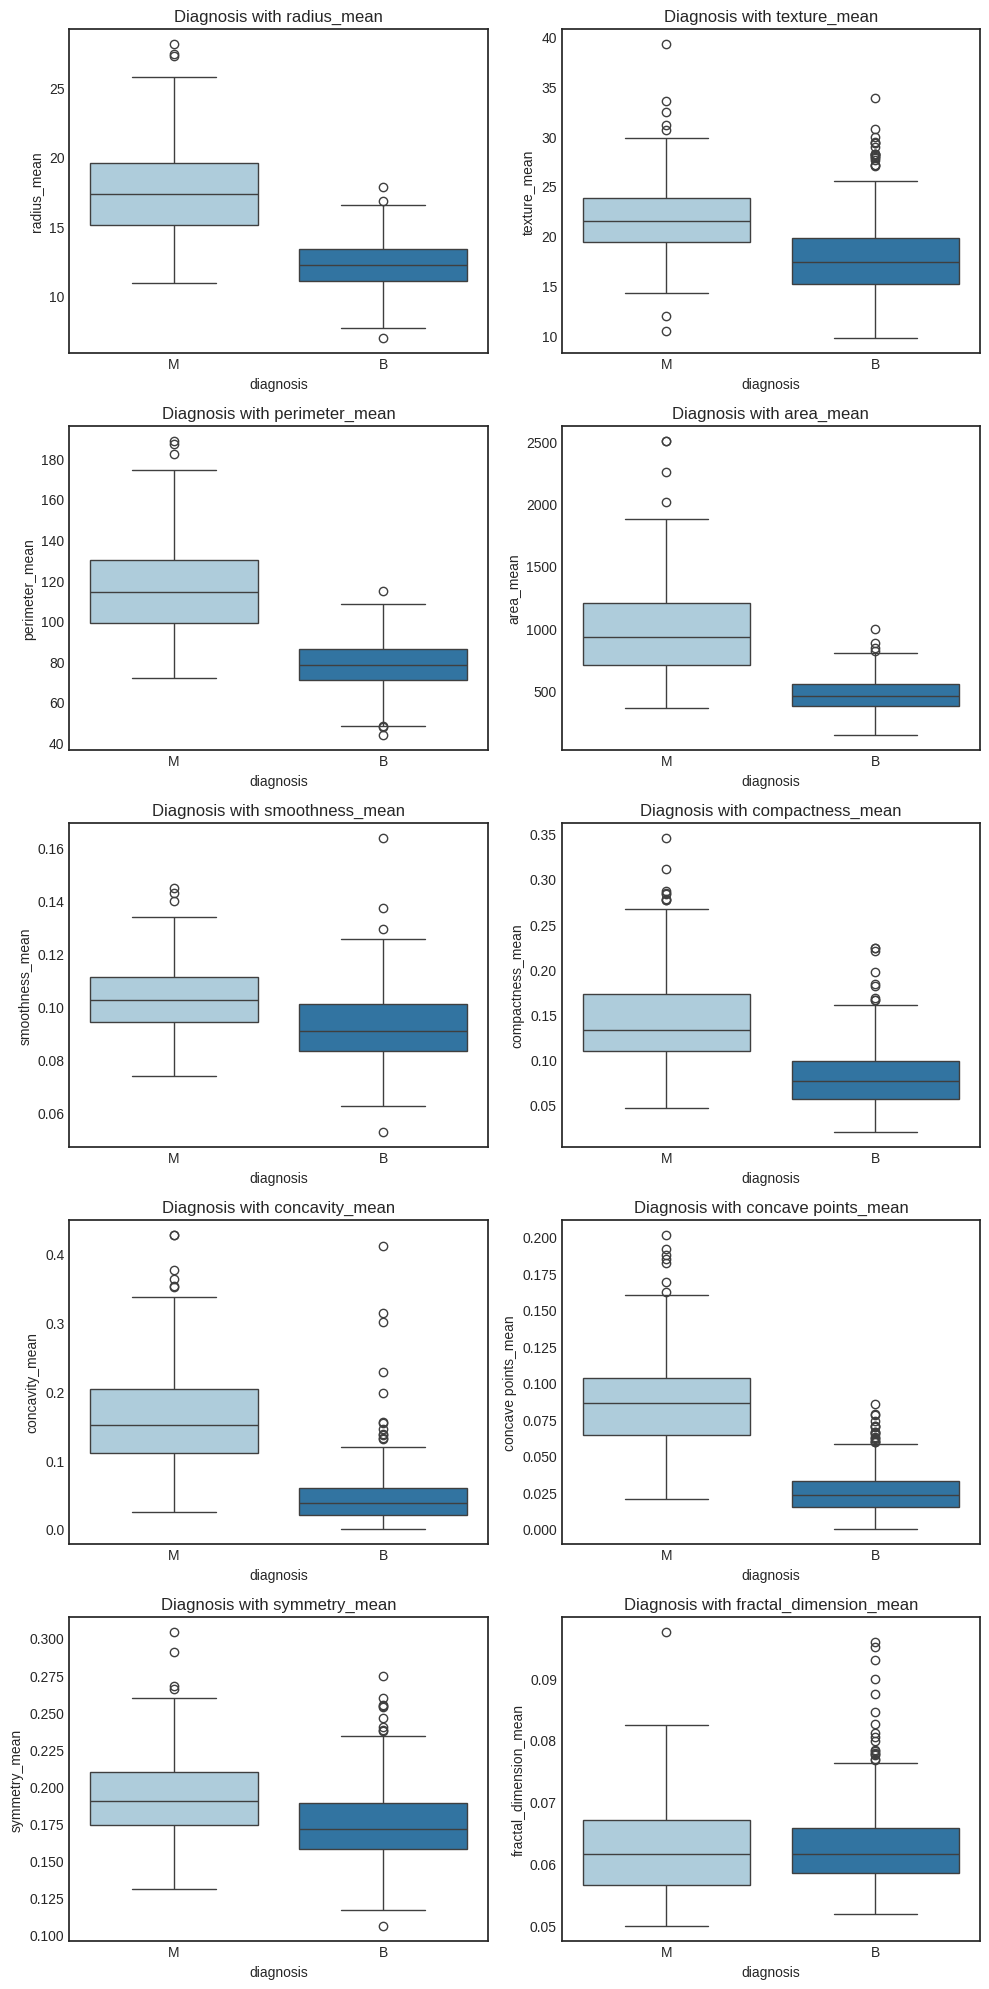

In [ ]:
# @title Distibution of data features with diagnosis column (data label)
plt.figure(figsize =(10, 20))
for i, val in enumerate((data_features)):
  plt.subplot(5, 2, i+1)
  sns.boxplot(x = df.diagnosis, y=df[data_features[i]], palette='Paired').set(title = f"Diagnosis with {val}")
plt.tight_layout ()

In [ ]:
# Show descriptive stats
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440


In [ ]:
# Encode the data label: 1 if M and 0 if B
df['diagnosis'] = df['diagnosis'].replace({'M': 1, 'B': 0})

<Axes: >

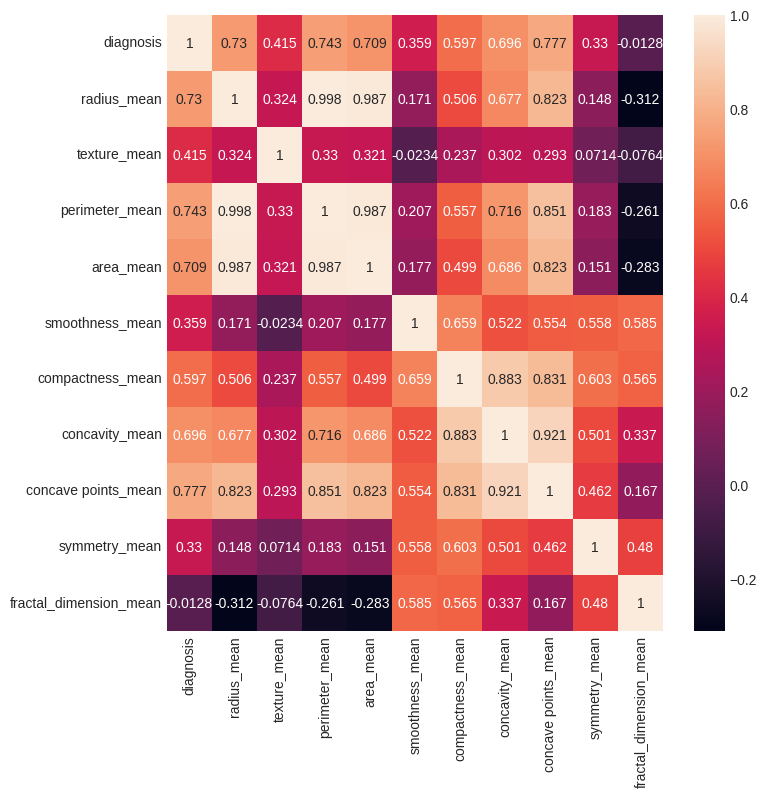

In [ ]:
# @title Heatmap by Pearson correlation
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(), annot=True, fmt=".3g")

**The highest correlations are between:**


*   radius_mean and perimeter_mean and area_mean and concave points_mean
*   compactness_mean and concavity_mean and concave points_mean

Let’s show the plots for some of these highly correlated features.

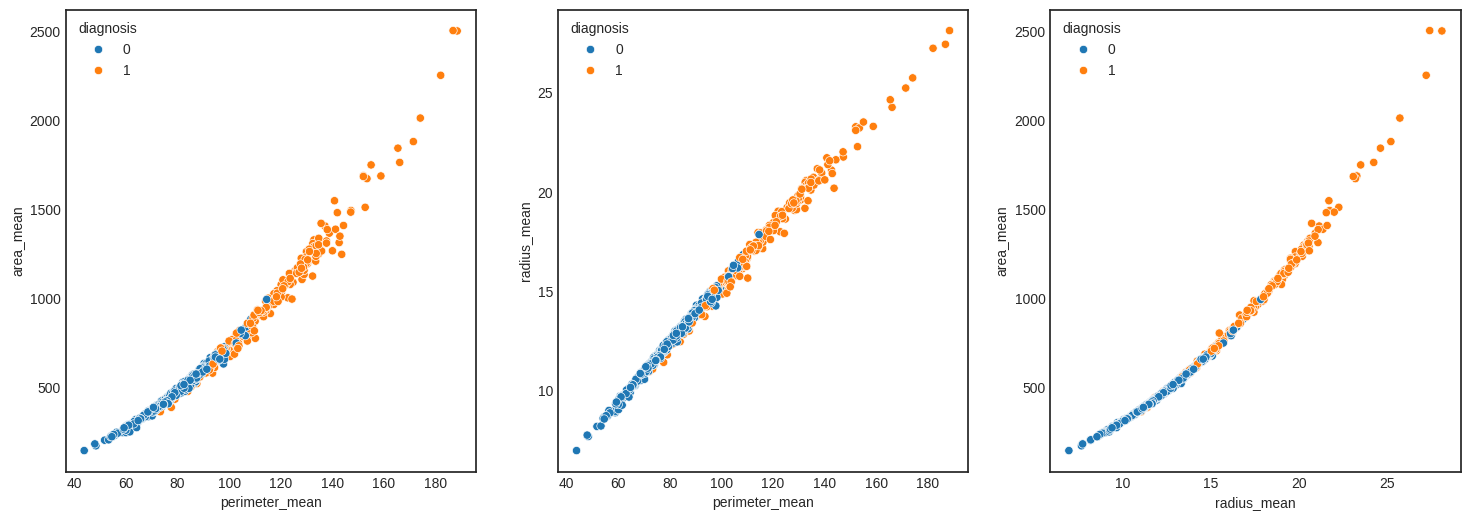

In [ ]:
# @title Boxplot for highly correlated features
# Diagnosis by Perimeter and Area
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
sns.scatterplot(data=df, x="perimeter_mean", y="area_mean", hue="diagnosis", ax=axes[0])
sns.scatterplot(data=df, x="perimeter_mean", y="radius_mean", hue="diagnosis", ax=axes[1])
sns.scatterplot(data=df, x="radius_mean", y="area_mean", hue="diagnosis", ax=axes[2])
plt.show()

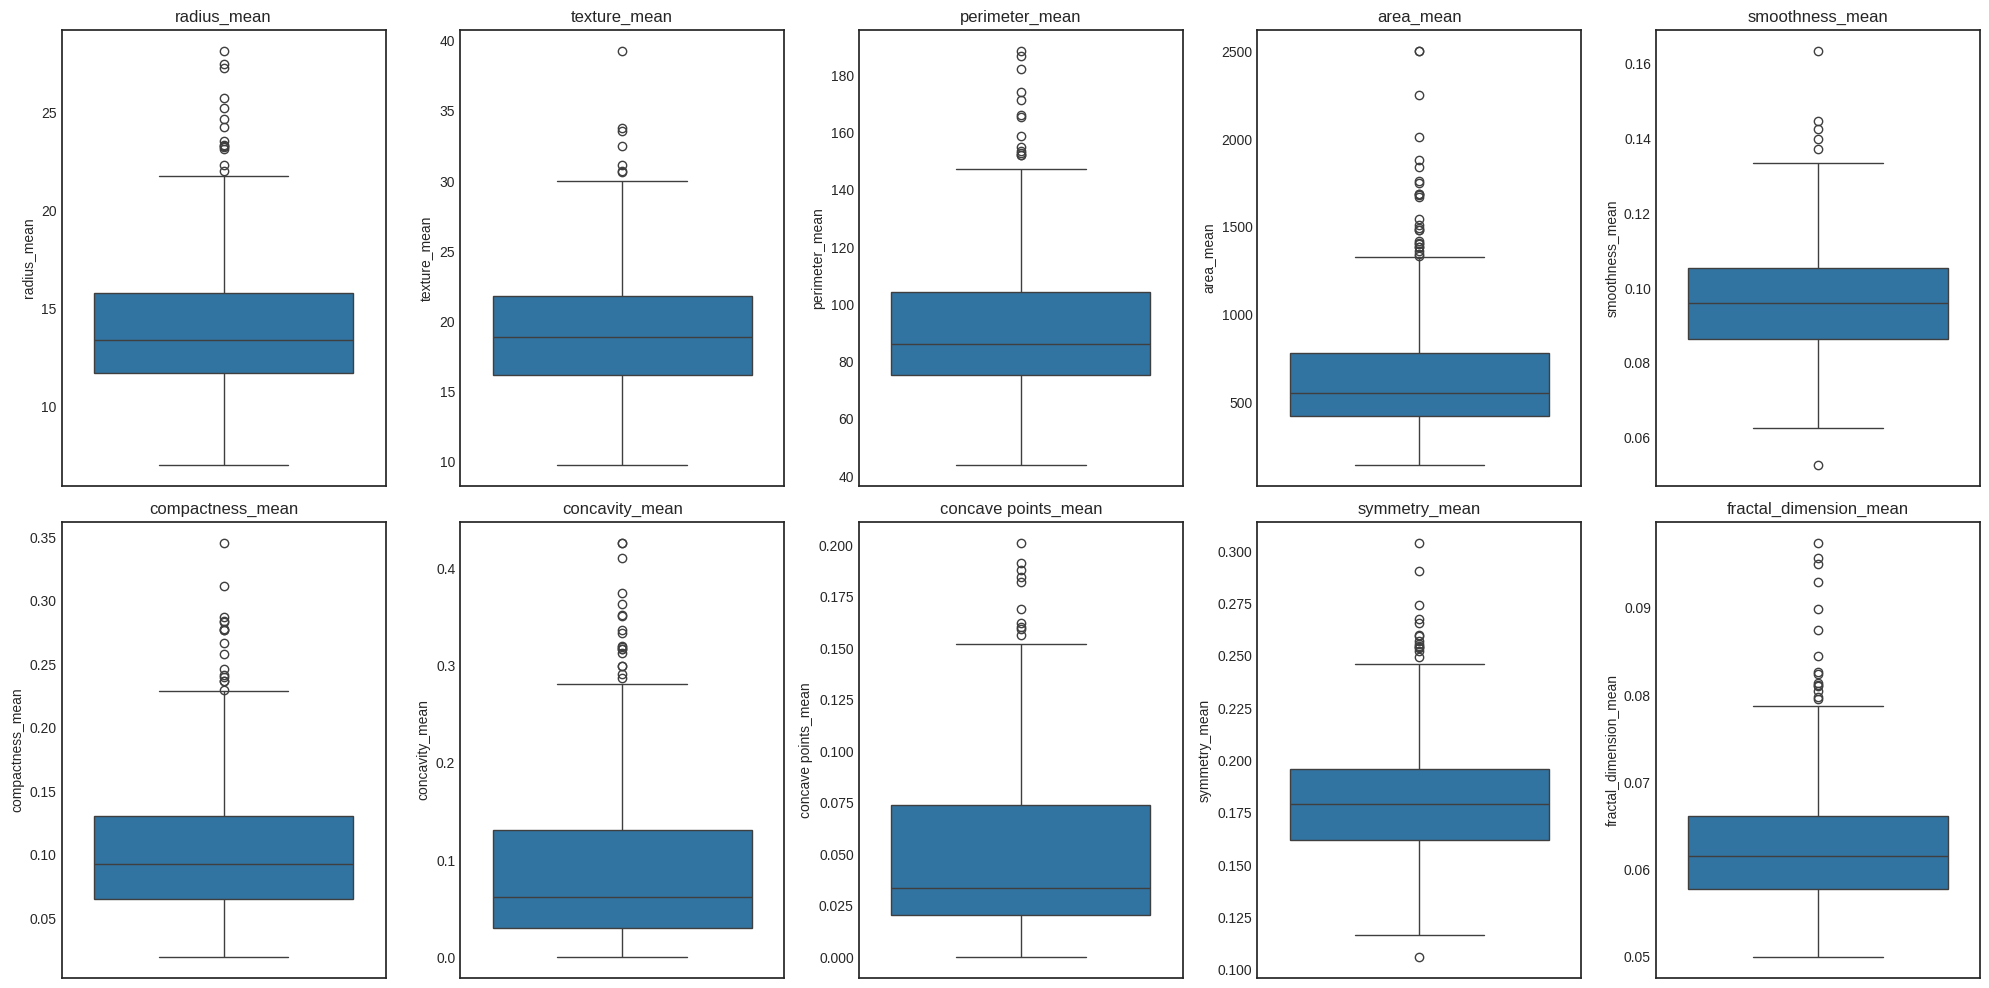

In [ ]:
# @title Outliers Detection

plt.figure(figsize =(20, 10))
plt.style.use('seaborn-white')
for i, val in enumerate((data_features)):
  plt.subplot(2, 5, i+1)
  sns.boxplot(df[data_features[i]]).set(title = f"{val}")
plt.tight_layout ()

In [ ]:
q = df['radius_mean'].quantile(0.98)
df_clean = df_clean[df['radius_mean']<q]

q = df['texture_mean'].quantile(0.98)
df_clean = df_clean[df['texture_mean'] < q]

q = df['perimeter_mean'].quantile(0.98)
df_clean = df_clean[df['perimeter_mean']<q]

q = df['area_mean'].quantile(0.98)
df_clean = df_clean[df['area_mean'] < q]

q = df['smoothness_mean'].quantile(0.98)
df_clean = df_clean[df['smoothness_mean']<q]

q = df['compactness_mean'].quantile(0.98)
df_clean = df_clean[df['compactness_mean'] < q]

q = df['concavity_mean'].quantile(0.98)
df_clean = df_clean[df['concavity_mean']<q]

q = df['concave points_mean'].quantile(0.98)
df_clean = df_clean[df['concave points_mean'] < q]

q = df['symmetry_mean'].quantile(0.98)
df_clean = df_clean[df['symmetry_mean']<q]

q = df['fractal_dimension_mean'].quantile(0.98)
df_clean = df_clean[df['fractal_dimension_mean'] < q]

df_clean.shape

(512, 11)

## Data preprocessing


In [ ]:
data = df_clean.copy()

In [ ]:
print("Shape of dataset: " + str(data.shape))

Shape of dataset: (512, 11)


In [ ]:
# Assign data features and data label
X = data.drop(['diagnosis'], axis=1)
y = data.diagnosis

In [ ]:
# Split data into train set and test set
from sklearn.model_selection import train_test_split, GridSearchCV
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)
print("Input Training:",X_train.shape)
print("Input Test:",X_test.shape)
print("Output Training:",y_train.shape)
print("Output Test:",y_test.shape)

Input Training: (358, 10)
Input Test: (154, 10)
Output Training: (358,)
Output Test: (154,)


In [ ]:
# Normalize the data
from sklearn.preprocessing import StandardScaler
normalizer = StandardScaler()
X_train = normalizer.fit_transform(X_train)     # Fit and transform the training data
X_test = normalizer.transform(X_test)           # Transform the test data.

In [ ]:
# Check if the data is imbalanced
print('Before oversampling: ' + str(X_train.shape))
print(np.unique(y_train, return_counts=True))

Before oversampling: (358, 10)
(array([0, 1]), array([234, 124]))


Since the difference is not that much, I decided not to use SMOTE.

## Data modelling
- Use GridSearchCV to find the best set of SVM hyperparameters.
- Build, train and evaluate the SVM model.
- Separately build, train and evaluate the other four classifiers (Logistic regression, Naive Bayes, Decision Tree, Random Forest) on the same dataset, then compare their performance with the SVM model's.

### SVM Model

In [ ]:
from sklearn.svm import SVC

In [ ]:
# Use GridSearchCV to find the best set of SVM hyperparameters.

In [ ]:
# Define a dictionary containing the hyper-parameters that will be tuned by GridSearchCV
params_svm = {"C": [0.1, 1, 10, 100],
              "gamma": [0.1, 0.01, 0.001, 0.0001],
              "kernel": ['rbf', 'linear']}

# Define the GridSearchCV object
svm_gs = GridSearchCV(estimator=SVC(), param_grid=params_svm, cv=5)
svm_gs.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': [0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf', 'linear']})

In [ ]:
# Get the best model
svm_best = svm_gs.best_estimator_
# Get the best hyperparameter
print("Best Hyperparameters:", svm_gs.best_params_)

Best Hyperparameters: {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}


In [ ]:
# Replace X_test and y_test with your actual data
best_model_score = svm_best.score(X_test, y_test)
print("Best Model Accuracy:", best_model_score)

Best Model Accuracy: 0.9415584415584416


In [ ]:
# @title Another approach
# Build a decision tree model pipeline from the best set of hyper-parameters found
from sklearn import svm
svm_model = svm.SVC(**svm_gs.best_params_)

# Train the decision tree model
svm_model.fit(X_train, y_train)

# Evaluate the SVM model accuracy
from sklearn.metrics import accuracy_score
y_pred = svm_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9415584415584416


### Logistic regression


In [ ]:
# Train a Logistic Regression model
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(solver='lbfgs', max_iter=1000)   # Initialize Logistic Regression model.
log_reg.fit(X_train, y_train)                                 # Fit the model to training set.

LogisticRegression(max_iter=1000)

In [ ]:
print('Logistic Regression: {}'.format(log_reg.score(X_test, y_test)))      # Logistic Regression accuracy

Logistic Regression: 0.9285714285714286


### Naive Bayes

In [ ]:
# Train a Naive Bayes model
from sklearn.naive_bayes import GaussianNB
naive_model = GaussianNB()
naive_model.fit(X_train, y_train)

GaussianNB()

In [ ]:
print('Naive Bayes: {}'.format(naive_model.score(X_test, y_test)))

Naive Bayes: 0.935064935064935


### Decision Tree

In [ ]:
# Train a Decision Tree clasifier
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
# params_dt = {}
params_dt = {"criterion": ["gini", "entropy"],             # Criterion to evaluate the purity.
            "max_depth": [3, 5],                           # Maximum depth of the tree
            "min_samples_split": [4, 8]}

dt_gs = GridSearchCV(dt, params_dt, cv=5)
dt_gs.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'], 'max_depth': [3, 5],
                         'min_samples_split': [4, 8]})

In [ ]:
# Best number of Trees.
dt_best = dt_gs.best_estimator_
print(dt_gs.best_params_)

{'criterion': 'gini', 'max_depth': 3, 'min_samples_split': 4}


In [ ]:
print('Decision Tree: {}'.format(dt_best.score(X_test, y_test)))            # Random Forest accuracy

Decision Tree: 0.9285714285714286


### Random Forest

In [ ]:
from sklearn.ensemble import VotingClassifier, RandomForestClassifier

In [ ]:
# Train a Random Forest classifier
rf = RandomForestClassifier()                        # Initialize a Random Forest Classifier.
params_rf = {'n_estimators': [50, 100, 200]}         # n_estimator in RandomForestClassifier(...) indicates the number of Trees in the Forest.
rf_gs = GridSearchCV(rf, params_rf, cv=5)            # Initialize GridSearchCV to find an optimal number of Trees.
rf_gs.fit(X_train, y_train)                          # Fit GridSearch in training set to find the optimal number of Trees.

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'n_estimators': [50, 100, 200]})

In [ ]:
# Best number of Trees.
rf_best = rf_gs.best_estimator_
print(rf_gs.best_params_)

{'n_estimators': 100}


In [ ]:
print('Random Forest: {}'.format(rf_best.score(X_test, y_test)))            # Random Forest accuracy

Random Forest: 0.948051948051948


### Model performance comparison

In [ ]:
# Compare each single model performance with the SVM model's

In [ ]:
# Print accuracy of single models on the test set
print('SVM: {}'.format(svm_best.score(X_test, y_test)))                     # SVM accuracy
print('Logistic Regression: {}'.format(log_reg.score(X_test, y_test)))      # Logistic Regression accuracy
print('Naive Bayes: {}'.format(naive_model.score(X_test, y_test)))          # Naive Bayes accuracy
print('Decision Tree: {}'.format(dt_best.score(X_test, y_test)))            # Decision Tree accuracy
print('Random Forest: {}'.format(rf_best.score(X_test, y_test)))            # Random Forest accuracy

SVM: 0.9415584415584416
Logistic Regression: 0.9285714285714286
Naive Bayes: 0.935064935064935
Decision Tree: 0.9285714285714286
Random Forest: 0.948051948051948


On this dataset, we can see that Random Forest model performs the best, with the accuracy score is approximately 94.8%, followed by SVM. However, Logistic Regression and Decision Tree model have weaker performances among all.

## Model ensemble
- Apply three model ensemble technics, i.e., Bagging, Boosting and Stacking, to solve the problem, then compare their performance with each other and with the use of individual models. Draw conclusion from what has been observed.

In [ ]:
# @title Stacking with SVM
# Ensemble the four models using hard (majority) voting
estimators=[('svm', svm_best), ('nb', naive_model), ('dt', dt_best), ('rf', rf_best), ('log_reg', log_reg)]    # Initialize base models in the ensemble
ensemble = VotingClassifier(estimators, voting='hard')                                      # Define how to ensemble them, i.e., hard voting
# Train the model ensemble on the training set
ensemble.fit(X_train, y_train)          # Train the ensemble on the training set
print('Stacking Accuracy: {}'.format(ensemble.score(X_test, y_test)))       # Stacking Accuracy

Stacking Accuracy: 0.961038961038961


In [ ]:
# @title Bagging with SVM
from sklearn.ensemble import BaggingClassifier
# Creating a Support Vector Machine Classifier as the base estimator
base_svm = SVC(kernel='linear', C=1.0)
# Create a Bagging Classifier with SVM as the base model
# estimator: the base model
# n_estimators: the number of base models to use
# max_samples: the fraction (if float) or the number of samples (if integer) to draw from X_train to train each base estimator (with replacement by default, i.e., bootstrap)
# Reference: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html
bagging_clf = BaggingClassifier(estimator=base_svm, n_estimators=10, max_samples=0.5)
# Training the Bagging Classifier
bagging_clf.fit(X_train, y_train)
# Evaluating the accuracy of the model
print('Bagging Accuracy: {}'.format(bagging_clf.score(X_test, y_test)))       # Bagging Accuracy

Bagging Accuracy: 0.935064935064935


### Boosting with SVM

In [ ]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

In [ ]:
# @title AdaBoost
# Create an AdaBoost Classifier with Decision Tree as the base model
# Reference: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html
ada_clf = AdaBoostClassifier(estimator = DecisionTreeClassifier(), n_estimators=10)

# Train the AdaBoost Classifier
ada_clf.fit(X_train, y_train)

# Making predictions on the test set
y_pred_ada = ada_clf.predict(X_test)

# Evaluating the accuracy of the model
accuracy_ada = accuracy_score(y_test, y_pred_ada)
print("AdaBoost Classifier Accuracy:", accuracy_ada)

AdaBoost Classifier Accuracy: 0.9090909090909091


In [ ]:
# @title Gradient Boosting
# Create a Gradient Boosting Classifier which uses Decision Tree as boosting model by default
# n_estimators: the number of boosting stages to perform.
# learning_rate: learning rate shrinks the contribution of each tree by learning_rate, i.e., f_0 + lr*delta_1 + lr*delta_2 + ...
# Reference: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html
gb_clf = GradientBoostingClassifier(n_estimators=10, learning_rate=0.1)

# Train the Gradient Boosting Classifier
gb_clf.fit(X_train, y_train)

# Making predictions on the test set
y_pred_gb = gb_clf.predict(X_test)

# Evaluating the accuracy of the model
accuracy_gb = accuracy_score(y_test, y_pred_gb)
print("Gradient Boosting Classifier Accuracy:", accuracy_gb)

Gradient Boosting Classifier Accuracy: 0.9415584415584416


In [ ]:
# @title XGBoost
# Create an XGBoost Classifier
# n_estimators: the number of boosting stages to perform.
# learning_rate: learning rate shrinks the contribution of each tree by learning_rate, i.e., f_0 + lr*delta_1 + lr*delta_2 + ...
# Reference: https://xgboost.readthedocs.io/en/latest/python/python_api.html
xgb_clf = XGBClassifier(n_estimators=100, learning_rate=0.1)

# Train the XGBoost Classifier
xgb_clf.fit(X_train, y_train)

# Making predictions on the test set
y_pred_xgb = xgb_clf.predict(X_test)

# Evaluating the accuracy of the model
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print("XGBoost Classifier Accuracy:", accuracy_xgb)

XGBoost Classifier Accuracy: 0.9675324675324676


In [ ]:
# @title Model performance comparison
print('SVM: {}'.format(svm_best.score(X_test, y_test)))                     # SVM accuracy
print('Logistic Regression: {}'.format(log_reg.score(X_test, y_test)))      # Logistic Regression accuracy
print('Naive Bayes: {}'.format(naive_model.score(X_test, y_test)))          # Naive Bayes accuracy
print('Decision Tree: {}'.format(dt_best.score(X_test, y_test)))            # Decision Tree accuracy
print('Random Forest: {}'.format(rf_best.score(X_test, y_test)))            # Random Forest accuracy
print('Stacking Accuracy: {}'.format(ensemble.score(X_test, y_test)))       # Stacking Accuracy
print('Bagging Accuracy: {}'.format(bagging_clf.score(X_test, y_test)))     # Bagging Accuracy
print("AdaBoost Classifier Accuracy:", accuracy_ada)                        # AdaBoost Classifier Accuracy
print("Gradient Boosting Classifier Accuracy:", accuracy_gb)                # Gradient Boosting Classifier Accuracy
print("XGBoost Classifier Accuracy:", accuracy_xgb)                         # XGBoost Classifier Accuracy

SVM: 0.9415584415584416
Logistic Regression: 0.9285714285714286
Naive Bayes: 0.935064935064935
Decision Tree: 0.9285714285714286
Random Forest: 0.948051948051948
Stacking Accuracy: 0.961038961038961
Bagging Accuracy: 0.935064935064935
AdaBoost Classifier Accuracy: 0.9090909090909091
Gradient Boosting Classifier Accuracy: 0.9415584415584416
XGBoost Classifier Accuracy: 0.9675324675324676


We can see that XGBoost Classifier have the highest accuracy (~ 96.7%).

## Conclusion

Based on the analysis of multiple machine learning models and ensemble techniques applied to the dataset, we can draw the following conclusions here:

1. The XGBoost Classifier model outperformed all other individual models and ensemble techniques with the highest accuracy of approximately 96.7%. This indicates that XGBoost Classifier is a strong candidate for classification tasks on this dataset.

2. Stacking technique showed promising result, with accuracies comparable to the top-performing individual models. This highlights the effectiveness of ensemble methods in improving model performance by combining multiple models.

3. SVM, Random Forest, and Gradient Boosting Classifier also performed well with accuracies above 94%. These models can be considered as reliable alternatives to SVM for classification tasks on similar datasets.

4. **Weak Performers**: Logistic Regression, Bagging, Naive Bayes and Decision Tree models had slightly lower accuracies compared to the top performers. Further optimization or feature engineering may be required to enhance their performance on this dataset.

5. **Improvement Areas**: AdaBoost Classifier had the lowest accuracy compared to other models. Fine-tuning hyperparameters or exploring different features could potentially boost its performance.

Based on the observed results, XGBoost Classifier stands out as the preferred choice for this dataset due to its high accuracy. However, we should conduct further analysis, such as feature selection and hyperparameter tuning, to optimize the model's performance.

** Disclaimer: Rerunning the model again can cause some differences in the accuracy score of each model. So the conclusions above is just made based on this runtime.*

